In [1]:
import pandas as pd
import numpy as np
import requests
import acquire
import prepare

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = acquire.get_all_stuff()

In [3]:
df = prepare.to_datetime_utc(df)

In [4]:
df = prepare.make_cols(df)

In [5]:
df = prepare.make_new_sales_amounts(df)

In [6]:
prepare.re_index_by_time(df)

### Make subplots where each is plotting sales over different periods (daily, weekly, monthly, e.g.). The sales should be grouped by store (color to represent store).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 20 columns):
item_id          913000 non-null int64
quantity         913000 non-null float64
sale_id          913000 non-null int64
store_id         913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null int64
item_brand       913000 non-null object
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
weekday          913000 non-null object
year             913000 non-null int64
quarter          913000 non-null int64
month            913000 non-null int64
day_of_month     913000 non-null int64
is_weekday       913000 non-null int64
sales_total      913000 non-null float64
dtypes: float64(3), int64(11), object(6)
memory usage: 146.3+ MB


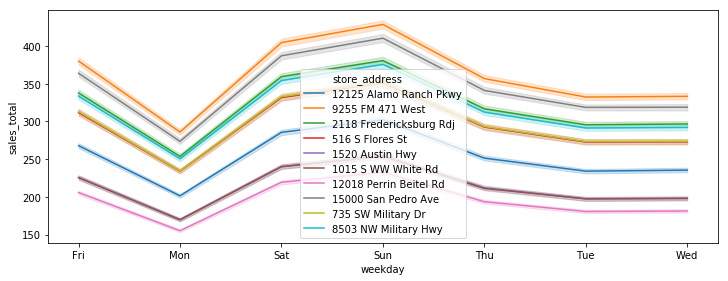

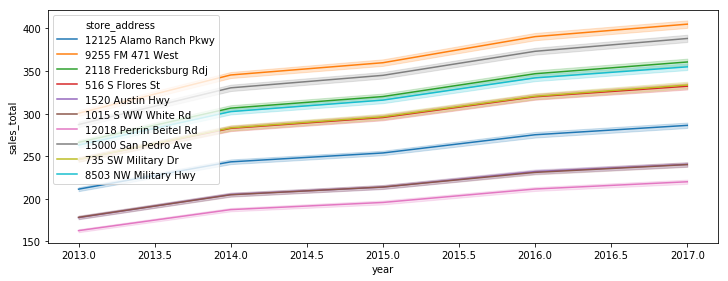

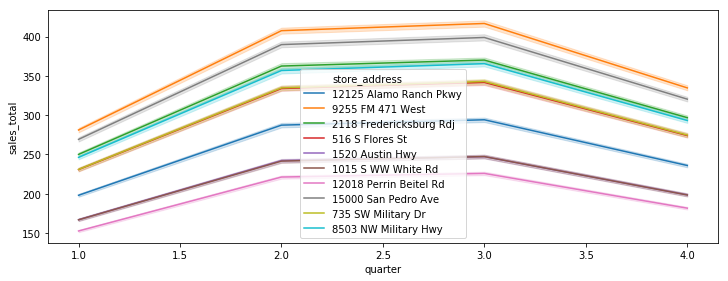

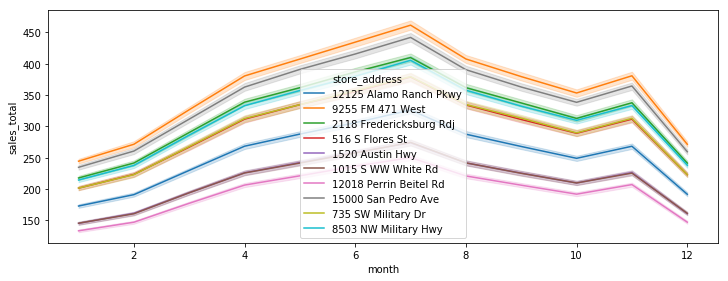

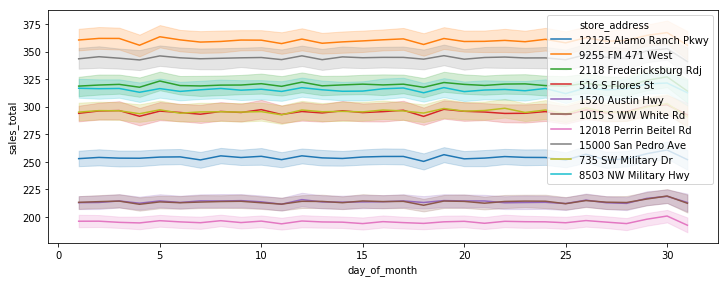

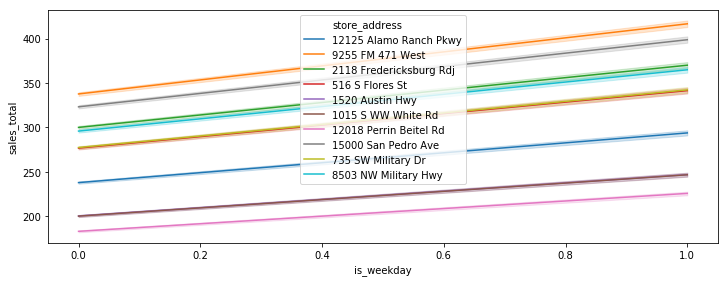

In [16]:
spans = ['weekday', 'year', 'quarter', 'month', 'day_of_month', 'is_weekday']

for i, feature in enumerate(spans):
    i = i+1
    plt.figure(figsize=(len(spans)*2, 30))
    plt.subplot(len(spans), 1, i)
    sns.lineplot(x=feature, y='sales_total', hue='store_address', data=df)

I want to see the number of each type of item that are sold over time for each store. Find a way to chart this. Hints: subplots for the piece with the fewest distinct values (like store), x = time, y = count, color = item. If you have too many distinct items, you may need to plot the top n, while aggregating the others into an 'other' bucket.

In [17]:
df.item_name.value_counts()

Natures Way Forskohlii - 60 Ct                                                                       18260
P.f. Changs Home Menu Meal For Two Beef With Broccoli                                                18260
Sundown Naturals Essential Electrolytes Tropical Punch Watermelon And Fruit Punch Gummies - 60 Ct    18260
Guava                                                                                                18260
Nakano Seasoned Rice Vinegar Original                                                                18260
Halls Menthol Cough Suppresant/oral Anesthetic Drops Honey-lemon - 30 Ct                             18260
Lea & Perrins Marinade In-a-bag Cracked Peppercorn                                                   18260
Plums Black                                                                                          18260
Dove Men + Care Antiperspirant Deodorant Cool Silver                                                 18260
Petmate Booda Bones Steak Bacon & Chi